Alunos

Diego Souza - E01131

Hugo Soares - E01381

Kamilah Santos - E01499



Seleção e redução de atributos

In [1]:
# Importar bibliotecas relevantes

import math
import random
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g., pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

from sklearn.preprocessing import MinMaxScaler # Padronização dos dados
from sklearn.preprocessing import LabelEncoder # Codificação das variáveis categóricas

%matplotlib inline

#import warnings
#warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('base_depressao_normalizada.csv', delimiter=';') # Base de dados com os registros de depressão (pessoas com e sem depressão)
df.shape

(16664, 108)

In [3]:
df.head()

,V0001,V0026,A02201,C006,C008,C009,C01001,C011,E005,E025,...,V02801,V02802,V029,V034,V03501,V03502,V03503,Y008,H003,VDP001
0,12,1,1.0,1.0,40.0,4.0,2.0,4.0,NaN,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,8.0
1,29,1,2.0,1.0,34.0,4.0,1.0,1.0,NaN,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0
2,35,1,1.0,1.0,51.0,4.0,1.0,1.0,NaN,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0
3,15,1,2.0,1.0,83.0,1.0,2.0,3.0,NaN,NaN,...,2.0,2.0,NaN,2.0,NaN,2.0,NaN,1.0,NaN,4.0
4,42,1,2.0,1.0,63.0,1.0,2.0,2.0,2.0,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,7.0


Analisando atributos para redução

In [4]:
# Selecionamos as linhas das pessoas que foram diagnosticadas com depressão
l = []
for i in range (0, len(df['Q092'])):
    if not math.isnan(df['Q092'][i]) and int(df['Q092'][i]) == 1:# Se não é NaN E Se tem depressão
        l.append(i)
diagnosticados = df.loc[l]

In [5]:
# Substitui a coluna de index
v = []
for i in range(0, 8332):
    v.append(i)
diagnosticados.set_index(pd.Index(v), inplace=True)

In [6]:
diagnosticados.shape

(8332, 108)

In [7]:
diagnosticados.head()

,V0001,V0026,A02201,C006,C008,C009,C01001,C011,E005,E025,...,V02801,V02802,V029,V034,V03501,V03502,V03503,Y008,H003,VDP001
0,11,1,1.0,2.0,55.0,1.0,1.0,1.0,NaN,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,3.0
1,11,1,2.0,1.0,42.0,1.0,1.0,1.0,NaN,NaN,...,2.0,2.0,NaN,2.0,1.0,2.0,NaN,1.0,6.0,1.0
2,11,1,2.0,2.0,33.0,1.0,2.0,4.0,NaN,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0
3,11,1,1.0,2.0,49.0,1.0,2.0,3.0,NaN,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0
4,11,1,1.0,2.0,58.0,4.0,1.0,1.0,2.0,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,7.0,6.0


In [8]:
diagnosticados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8332 entries, 0 to 8331
Columns: 108 entries, V0001 to VDP001
dtypes: float64(106), int64(2)
memory usage: 6.9 MB


In [9]:
# Verificando valores ausentes (NaN) nas variáveis
print('Valores ausentes (NaN) em:')
total_linhas = df.shape[0] # 16664
for col in [df.columns[i] for i in range(0, len(df.columns))]:
    print(col,':', any(df[col].isna()), "->", df[col].isnull().sum(), "->", '{:.1f}%'.format((df[col].isnull().sum()/total_linhas)*100))

Valores ausentes (NaN) em:
V0001 : False -> 0 -> 0.0%
V0026 : False -> 0 -> 0.0%
A02201 : False -> 0 -> 0.0%
C006 : False -> 0 -> 0.0%
C008 : False -> 0 -> 0.0%
C009 : False -> 0 -> 0.0%
C01001 : False -> 0 -> 0.0%
C011 : False -> 0 -> 0.0%
E005 : True -> 8268 -> 49.6%
E025 : True -> 15915 -> 95.5%
E02601 : True -> 8552 -> 51.3%
J001 : False -> 0 -> 0.0%
J00101 : False -> 0 -> 0.0%
J002 : False -> 0 -> 0.0%
J00402 : True -> 13937 -> 83.6%
J007 : False -> 0 -> 0.0%
J00801 : True -> 4400 -> 26.4%
J039 : True -> 14824 -> 89.0%
M007 : True -> 15606 -> 93.7%
M009 : True -> 8112 -> 48.7%
M01001 : True -> 9931 -> 59.6%
M011021 : True -> 8112 -> 48.7%
M01401 : False -> 0 -> 0.0%
M01501 : False -> 0 -> 0.0%
M01601 : False -> 0 -> 0.0%
M01701 : False -> 0 -> 0.0%
M01801 : False -> 0 -> 0.0%
M01901 : False -> 0 -> 0.0%
N001 : False -> 0 -> 0.0%
N00101 : False -> 0 -> 0.0%
N010 : False -> 0 -> 0.0%
N011 : False -> 0 -> 0.0%
N012 : False -> 0 -> 0.0%
N013 : False -> 0 -> 0.0%
N014 : False -> 0 -> 0

In [10]:
def calcula_quantidade_respostas_Pos_Neg(colum):
    count1 = 0
    count2 = 0
    count3 = 0
    count4 = 0
    count9 = 0
    for i in range(0, len(diagnosticados[colum])):
        if int(diagnosticados[colum][i]) == 1:
            count1 += 1
        if int(diagnosticados[colum][i]) == 2:
            count2 += 1
        if int(diagnosticados[colum][i]) == 3:
            count3 += 1
        if int(diagnosticados[colum][i]) == 4:
            count4 += 1
        if int(diagnosticados[colum][i]) == 9:
            count9 += 1
            
    return [count1, count2, count3, count4, count9]

In [11]:
print(calcula_quantidade_respostas_Pos_Neg('P050')) # Fuma algum produto de tabaco

[1128, 112, 7092, 0, 0]


In [12]:
# Muitas respostas negativas
print(calcula_quantidade_respostas_Pos_Neg('P067')) # Sr (a) masca fumo, usa rapé ou algum outro produto do tabaco que não faz fumaça?

[10, 16, 8306, 0, 0]


In [13]:
print(calcula_quantidade_respostas_Pos_Neg('P06701')) # O(a) Sr(a) usa aparelhos eletrônicos com nicotina líquida ou folha de tabaco picado (cigarro eletrônico, narguilé eletrônico, cigarro aquecido ou outro dispositivo eletrônico para fumar ou vaporizar)?

[4, 22, 82, 8224, 0]


In [14]:
# Retirado
print(calcula_quantidade_respostas_Pos_Neg('A02201')) # Em seu domicílio, há algum animal de estimação?

[5114, 3218, 0, 0, 0]


In [15]:
# Retirado
print(calcula_quantidade_respostas_Pos_Neg('C01001')) # Cônjuge ou companheiro(a) mora em nesse domicílio

[4062, 4270, 0, 0, 0]


### Removendo atributos desnecessários

In [16]:
codigos_removidos = []
with open('atributos_descartados.txt', 'r', encoding='iso-8859-1') as c:
    for code in c:
        codigos_removidos.append(code.strip())

base_intermediaria = df.drop(codigos_removidos, axis=1)

In [17]:
base_intermediaria.head()

,V0026,C006,C009,J00101,J002,J007,M01401,M01501,M01601,M01701,...,V00204,V00205,V01401,V01402,V01403,V01404,V01405,V02801,V02802,Y008
0,1,1.0,4.0,1.0,2.0,2.0,3.0,0.0,1.0,6.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
1,1,1.0,4.0,1.0,2.0,2.0,3.0,3.0,2.0,6.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
2,1,1.0,4.0,2.0,2.0,1.0,2.0,0.0,6.0,6.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
3,1,1.0,1.0,2.0,2.0,2.0,3.0,0.0,2.0,3.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
4,1,1.0,1.0,3.0,2.0,1.0,2.0,2.0,2.0,6.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0


In [18]:
base_intermediaria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16664 entries, 0 to 16663
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0026   16664 non-null  int64  
 1   C006    16664 non-null  float64
 2   C009    16664 non-null  float64
 3   J00101  16664 non-null  float64
 4   J002    16664 non-null  float64
 5   J007    16664 non-null  float64
 6   M01401  16664 non-null  float64
 7   M01501  16664 non-null  float64
 8   M01601  16664 non-null  float64
 9   M01701  16664 non-null  float64
 10  N010    16664 non-null  float64
 11  N011    16664 non-null  float64
 12  N012    16664 non-null  float64
 13  N014    16664 non-null  float64
 14  N016    16664 non-null  float64
 15  N017    16664 non-null  float64
 16  N018    16664 non-null  float64
 17  P027    16664 non-null  float64
 18  P034    16664 non-null  float64
 19  P04502  16664 non-null  float64
 20  P050    16664 non-null  float64
 21  Q092    16664 non-null  float64
 22

In [19]:
base_intermediaria.shape

(16664, 40)

In [20]:
# Verificando valores ausentes (NaN) nas variáveis
print('Valores ausentes (NaN) em:')
total_linhas = base_intermediaria.shape[0] # 16664
for col in [base_intermediaria.columns[i] for i in range(0, len(base_intermediaria.columns))]:
    print(col,':', any(base_intermediaria[col].isna()), "->", base_intermediaria[col].isnull().sum(), "->", '{:.1f}%'.format((base_intermediaria[col].isnull().sum()/total_linhas)*100))

Valores ausentes (NaN) em:
V0026 : False -> 0 -> 0.0%
C006 : False -> 0 -> 0.0%
C009 : False -> 0 -> 0.0%
J00101 : False -> 0 -> 0.0%
J002 : False -> 0 -> 0.0%
J007 : False -> 0 -> 0.0%
M01401 : False -> 0 -> 0.0%
M01501 : False -> 0 -> 0.0%
M01601 : False -> 0 -> 0.0%
M01701 : False -> 0 -> 0.0%
N010 : False -> 0 -> 0.0%
N011 : False -> 0 -> 0.0%
N012 : False -> 0 -> 0.0%
N014 : False -> 0 -> 0.0%
N016 : False -> 0 -> 0.0%
N017 : False -> 0 -> 0.0%
N018 : False -> 0 -> 0.0%
P027 : False -> 0 -> 0.0%
P034 : False -> 0 -> 0.0%
P04502 : False -> 0 -> 0.0%
P050 : False -> 0 -> 0.0%
Q092 : False -> 0 -> 0.0%
Q09202 : True -> 8332 -> 50.0%
Q09301 : True -> 8332 -> 50.0%
Q109 : True -> 8332 -> 50.0%
Q11006 : False -> 0 -> 0.0%
S065 : True -> 3908 -> 23.5%
V00201 : True -> 308 -> 1.8%
V00202 : True -> 308 -> 1.8%
V00203 : True -> 308 -> 1.8%
V00204 : True -> 308 -> 1.8%
V00205 : True -> 308 -> 1.8%
V01401 : True -> 308 -> 1.8%
V01402 : True -> 308 -> 1.8%
V01403 : True -> 308 -> 1.8%
V01404 :

In [21]:
base_intermediaria.corr()

,V0026,C006,C009,J00101,J002,J007,M01401,M01501,M01601,M01701,...,V00204,V00205,V01401,V01402,V01403,V01404,V01405,V02801,V02802,Y008
V0026,1.000000,-6.448746e-02,0.094656,0.053827,0.027130,0.044597,0.057183,0.027382,0.129648,-0.008721,...,0.020471,0.032818,0.013621,0.019686,-0.003215,0.009439,0.006270,0.041118,0.038196,0.003458
C006,-0.064487,1.000000e+00,0.016344,0.018752,-0.050355,-0.043093,-0.019563,-0.039324,0.016067,0.032389,...,-0.005756,-0.019215,-0.009533,-0.017723,0.012285,-0.020676,0.021653,-0.099540,-0.102370,-0.017851
C009,0.094656,1.634394e-02,1.000000,0.070789,-0.000467,0.090901,-0.053880,-0.103141,0.054074,0.039699,...,-0.028613,-0.011615,-0.011009,-0.028328,-0.014471,-0.009625,-0.014145,-0.000001,-0.018679,0.007940
J00101,0.053827,1.875226e-02,0.070789,1.000000,-0.318027,-0.274645,-0.110355,-0.142684,0.176013,0.083630,...,-0.095093,-0.059493,-0.051909,-0.059027,-0.048134,-0.036103,-0.062153,-0.053024,-0.072833,0.012194
J002,0.027130,-5.035469e-02,-0.000467,-0.318027,1.000000,0.181424,0.069953,0.051478,-0.053131,-0.001119,...,0.093059,0.045598,0.043879,0.057086,0.040255,0.025463,0.069738,0.079362,0.086719,0.003738
J007,0.044597,-4.309285e-02,0.090901,-0.274645,0.181424,1.000000,0.027008,0.004420,-0.056523,0.008759,...,0.064167,0.025488,0.011552,0.031101,0.019277,0.022123,0.030401,0.068149,0.073362,0.011088
M01401,0.057183,-1.956282e-02,-0.053880,-0.110355,0.069953,0.027008,1.000000,0.283452,-0.093931,-0.074440,...,0.083275,0.072633,0.066264,0.086478,0.053957,0.040699,0.050868,0.048111,0.068184,-0.014252
M01501,0.027382,-3.932379e-02,-0.103141,-0.142684,0.051478,0.004420,0.283452,1.000000,-0.163280,-0.140059,...,0.029584,0.046068,0.031339,0.034058,0.020979,0.022932,0.011853,0.023109,0.033211,-0.008202
M01601,0.129648,1.606718e-02,0.054074,0.176013,-0.053131,-0.056523,-0.093931,-0.163280,1.000000,0.196110,...,0.013335,0.009986,0.012957,0.016240,0.006169,0.004430,0.012826,0.021960,-0.001439,-0.009361
M01701,-0.008721,3.238881e-02,0.039699,0.083630,-0.001119,0.008759,-0.074440,-0.140059,0.196110,1.000000,...,0.021976,0.012909,0.003358,0.011743,0.005541,0.001380,0.016189,0.019821,0.013606,-0.010111


Mesmo selecionando os atributos, atingimos uma quantidade correspondente a 40. Sendo assim, ainda é um valor alto para que a predição e análise seja acertiva. 

Dessa forma, vamos analisar a correspondência das respostas dos atributos referentes à violência, caso tenham uma quantidade considerável de respostas "não" e "não aplicável" serão descartados.

Atributos analisados:

V00201 : True -> 90 -> 1.1% - Nos últimos doze meses, alguém: Te ofendeu, humilhou ou ridicularizou na frente de outras pessoas?

V00202 : True -> 90 -> 1.1% - Nos últimos doze meses, alguém: Gritou com você ou te xingou?

V00203 : True -> 90 -> 1.1% - Nos últimos doze meses, alguém: Usou redes sociais ou celular para ameaçar, ofender, xingar ou expor imagens suas sem o seu consentimento?

V00204 : True -> 90 -> 1.1% - Nos últimos doze meses, alguém: Te ameaçou de ferir ou machucar alguém importante para você?

V00205 : True -> 90 -> 1.1% - Nos últimos doze meses, alguém: Destruiu alguma coisa sua de propósito?

V01401 : True -> 90 -> 1.1% - Nos últimos doze meses, alguém: Te deu um tapa ou uma bofetada?

V01402 : True -> 90 -> 1.1% - Nos últimos doze meses, alguém: Te empurrou, segurou com força ou jogou algo em você com a intenção de machucar?

V01403 : True -> 90 -> 1.1% - Nos últimos doze meses, alguém: Te deu um soco, chutou ou arrastou pelo cabelo?

V01404 : True -> 90 -> 1.1% - Nos últimos doze meses, alguém: Tentou ou efetivamente estrangulou, asfixiou ou te queimou de propósito?

V01405 : True -> 90 -> 1.1% - Nos últimos doze meses, alguém: Te ameaçou ou feriu com uma faca, arma de fogo ou alguma outra arma ou objeto?

V02801 : True -> 255 -> 3.1% - E alguma vez na vida, alguém: tocou, manipulou, beijou ou expôs partes do seu corpo contra sua vontade

V02802 : True -> 255 -> 3.1% - E alguma vez na vida, alguém: Te ameaçou ou forçou a ter relações sexuais ou quaisquer outros atos sexuais contra sua vontade?

Y008 : True -> 90 -> 1.1% - Qual é a sua orientação sexual?

In [22]:
def calcula_quantidade_respostas_Pos_Neg(colum, base):
    count1 = 0
    count2 = 0
    countN = 0# não aplicável/nulo
    for i in range(0, len(base[colum])):
        if not math.isnan(base[colum][i]):
            if int(base[colum][i]) == 1:
                count1 += 1
            if int(base[colum][i]) == 2:
                count2 += 1
            
        else:
            countN += 1
            
    return ("sim:" , count1, "não:", count2, "Não aplicável:",countN)

In [23]:
print(calcula_quantidade_respostas_Pos_Neg('V00201', diagnosticados)) # Nos últimos doze meses, alguém: Te ofendeu, humilhou ou ridicularizou na frente de outras pessoas?

('sim:', 1666, 'não:', 6576, 'Não aplicável:', 90)


In [24]:
print(calcula_quantidade_respostas_Pos_Neg('V00202', diagnosticados))#Nos últimos doze meses, alguém: Gritou com você ou te xingou?

('sim:', 1925, 'não:', 6317, 'Não aplicável:', 90)


In [25]:
print(calcula_quantidade_respostas_Pos_Neg('V00203', diagnosticados))#Nos últimos doze meses, alguém: Usou redes sociais ou celular para ameaçar, ofender, xingar ou expor imagens suas sem o seu consentimento?

('sim:', 422, 'não:', 7820, 'Não aplicável:', 90)


In [26]:
print(calcula_quantidade_respostas_Pos_Neg('V00204', diagnosticados))#Nos últimos doze meses, alguém: Te ameaçou de ferir ou machucar alguém importante para você?


('sim:', 919, 'não:', 7323, 'Não aplicável:', 90)


In [27]:
print(calcula_quantidade_respostas_Pos_Neg('V00205', diagnosticados))#Nos últimos doze meses, alguém: Destruiu alguma coisa sua de propósito?


('sim:', 393, 'não:', 7849, 'Não aplicável:', 90)


In [28]:
print(calcula_quantidade_respostas_Pos_Neg('V01401', diagnosticados))# Nos últimos doze meses, alguém: Te deu um tapa ou uma bofetada?


('sim:', 245, 'não:', 7997, 'Não aplicável:', 90)


In [29]:
print(calcula_quantidade_respostas_Pos_Neg('V01402', diagnosticados))#Nos últimos doze meses, alguém: Te empurrou, segurou com força ou jogou algo em você com a intenção de machucar?


('sim:', 421, 'não:', 7821, 'Não aplicável:', 90)


In [30]:
print(calcula_quantidade_respostas_Pos_Neg('V01403', diagnosticados))#Nos últimos doze meses, alguém: Te deu um soco, chutou ou arrastou pelo cabelo?


('sim:', 175, 'não:', 8067, 'Não aplicável:', 90)


In [31]:
print(calcula_quantidade_respostas_Pos_Neg('V01404', diagnosticados))#Nos últimos doze meses, alguém: Tentou ou efetivamente estrangulou, asfixiou ou te queimou de propósito?


('sim:', 66, 'não:', 8176, 'Não aplicável:', 90)


In [32]:
print(calcula_quantidade_respostas_Pos_Neg('V01405', diagnosticados))#Nos últimos doze meses, alguém: Te ameaçou ou feriu com uma faca, arma de fogo ou alguma outra arma ou objeto?


('sim:', 223, 'não:', 8019, 'Não aplicável:', 90)


In [33]:
print(calcula_quantidade_respostas_Pos_Neg('V02801', diagnosticados))#E alguma vez na vida, alguém: tocou, manipulou, beijou ou expôs partes do seu corpo contra sua vontade


('sim:', 883, 'não:', 7194, 'Não aplicável:', 255)


In [34]:
print(calcula_quantidade_respostas_Pos_Neg('V02802', diagnosticados))#E alguma vez na vida, alguém: Te ameaçou ou forçou a ter relações sexuais ou quaisquer outros atos sexuais contra sua vontade?


('sim:', 722, 'não:', 7355, 'Não aplicável:', 255)


In [35]:
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
count6 = 0

for i in range(0, len(diagnosticados['Y008'])):
        if not math.isnan(diagnosticados['Y008'][i]):
            if int(diagnosticados['Y008'][i]) == 1:
                count1 += 1
            if int(diagnosticados['Y008'][i]) == 2:
                count2 += 1
            if int(diagnosticados['Y008'][i]) == 3:
                count3 += 1
            if int(diagnosticados['Y008'][i]) == 4:
                count4 += 1
            if int(diagnosticados['Y008'][i]) == 5:
                count5 += 1
        else:
            count6 += 1
            
print ("heterossexual:" , count1, "bissexual:", count2,"homossexual:", count3, "outra orientação:" ,count4, "não sabe:",count5, "Recusou-se a responder:",count6)

heterossexual: 7781 bissexual: 103 homossexual: 138 outra orientação: 13 não sabe: 68 Recusou-se a responder: 90


Após a análise dos atributos, optamos por removê-los, visto que as respostas positivas eram irrelevantes dentre a quantidade de respostas observadas, sendo assim, ficamos com um total de 26 atributos, os quais não possuem respostas ausentes.

**Montagem da base de dados** 

In [36]:
#Criação da base final (com pessoas com e sem depressão)
codigos_removidos = []
with open('atributos_descartados_2.txt', 'r', encoding='iso-8859-1') as c:
    for code in c:
        codigos_removidos.append(code.strip())

base_final = df.drop(codigos_removidos, axis=1)

In [37]:
#Criação da base final com pessoas com  depressão
codigos_removidos = []
with open('atributos_descartados_2.txt', 'r', encoding='iso-8859-1') as c:
    for code in c:
        codigos_removidos.append(code.strip())

base_final_depressao_sim = diagnosticados.drop(codigos_removidos, axis=1)

In [38]:
# Verificando valores ausentes (NaN) nas variáveis da base
print('Valores ausentes (NaN) em:')
total_linhas = base_final.shape[0] # 16664
for col in [base_final.columns[i] for i in range(0, len(base_final.columns))]:
    print(col,':', any(base_final[col].isna()), "->", base_final[col].isnull().sum(), "->", '{:.1f}%'.format((base_final[col].isnull().sum()/total_linhas)*100))

Valores ausentes (NaN) em:
V0026 : False -> 0 -> 0.0%
C006 : False -> 0 -> 0.0%
C009 : False -> 0 -> 0.0%
J00101 : False -> 0 -> 0.0%
J002 : False -> 0 -> 0.0%
J007 : False -> 0 -> 0.0%
M01401 : False -> 0 -> 0.0%
M01501 : False -> 0 -> 0.0%
M01601 : False -> 0 -> 0.0%
M01701 : False -> 0 -> 0.0%
N010 : False -> 0 -> 0.0%
N011 : False -> 0 -> 0.0%
N012 : False -> 0 -> 0.0%
N014 : False -> 0 -> 0.0%
N016 : False -> 0 -> 0.0%
N017 : False -> 0 -> 0.0%
N018 : False -> 0 -> 0.0%
P027 : False -> 0 -> 0.0%
P034 : False -> 0 -> 0.0%
P04502 : False -> 0 -> 0.0%
P050 : False -> 0 -> 0.0%
Q092 : False -> 0 -> 0.0%
Q09202 : True -> 8332 -> 50.0%
Q09301 : True -> 8332 -> 50.0%
Q109 : True -> 8332 -> 50.0%
Q11006 : False -> 0 -> 0.0%


In [39]:
# Verificando valores ausentes (NaN) nas variáveis da base reduzidas de casos com depressção
print('Valores ausentes (NaN) em:')
total_linhas = base_final_depressao_sim.shape[0] # 16664
for col in [base_final_depressao_sim.columns[i] for i in range(0, len(base_final_depressao_sim.columns))]:
    print(col,':', any(base_final_depressao_sim[col].isna()), "->", base_final_depressao_sim[col].isnull().sum(), "->", '{:.1f}%'.format((base_final_depressao_sim[col].isnull().sum()/total_linhas)*100))

Valores ausentes (NaN) em:
V0026 : False -> 0 -> 0.0%
C006 : False -> 0 -> 0.0%
C009 : False -> 0 -> 0.0%
J00101 : False -> 0 -> 0.0%
J002 : False -> 0 -> 0.0%
J007 : False -> 0 -> 0.0%
M01401 : False -> 0 -> 0.0%
M01501 : False -> 0 -> 0.0%
M01601 : False -> 0 -> 0.0%
M01701 : False -> 0 -> 0.0%
N010 : False -> 0 -> 0.0%
N011 : False -> 0 -> 0.0%
N012 : False -> 0 -> 0.0%
N014 : False -> 0 -> 0.0%
N016 : False -> 0 -> 0.0%
N017 : False -> 0 -> 0.0%
N018 : False -> 0 -> 0.0%
P027 : False -> 0 -> 0.0%
P034 : False -> 0 -> 0.0%
P04502 : False -> 0 -> 0.0%
P050 : False -> 0 -> 0.0%
Q092 : False -> 0 -> 0.0%
Q09202 : False -> 0 -> 0.0%
Q09301 : False -> 0 -> 0.0%
Q109 : False -> 0 -> 0.0%
Q11006 : False -> 0 -> 0.0%


In [40]:
base_final_depressao_sim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8332 entries, 0 to 8331
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0026   8332 non-null   int64  
 1   C006    8332 non-null   float64
 2   C009    8332 non-null   float64
 3   J00101  8332 non-null   float64
 4   J002    8332 non-null   float64
 5   J007    8332 non-null   float64
 6   M01401  8332 non-null   float64
 7   M01501  8332 non-null   float64
 8   M01601  8332 non-null   float64
 9   M01701  8332 non-null   float64
 10  N010    8332 non-null   float64
 11  N011    8332 non-null   float64
 12  N012    8332 non-null   float64
 13  N014    8332 non-null   float64
 14  N016    8332 non-null   float64
 15  N017    8332 non-null   float64
 16  N018    8332 non-null   float64
 17  P027    8332 non-null   float64
 18  P034    8332 non-null   float64
 19  P04502  8332 non-null   float64
 20  P050    8332 non-null   float64
 21  Q092    8332 non-null   float64
 22  

Análise de outliers com registros positivos

<Axes: >

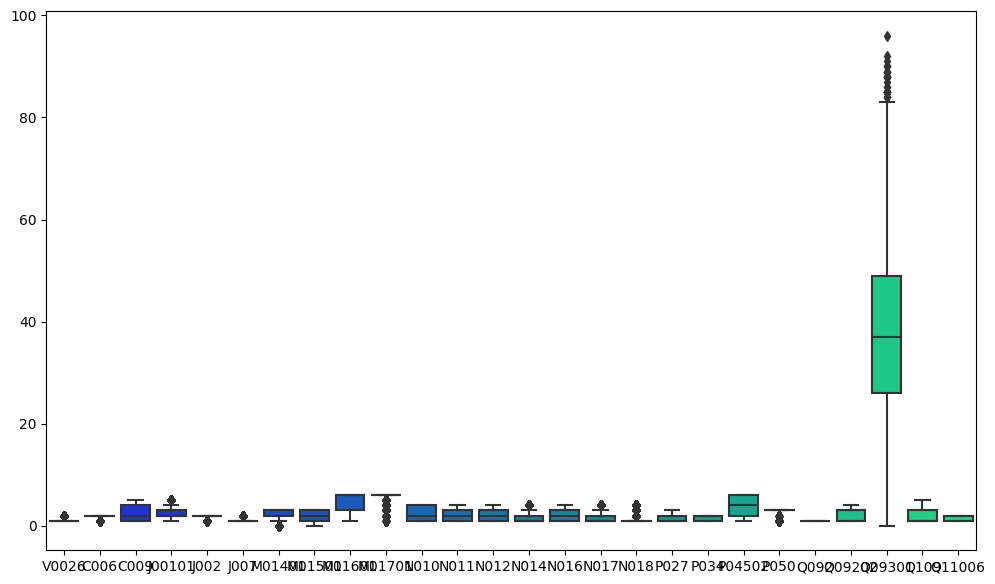

In [41]:
plt.figure(figsize=(12, 7)) #define o tamanho da figura
sns.boxplot(data=base_final_depressao_sim,palette='winter') # pega
# os pontos acimas são outline, os seja dados com pouca frequência que não impacta no resultado
# boxplot : grafico de caixa e calcula a média e que exibia pelo linha

<Axes: >

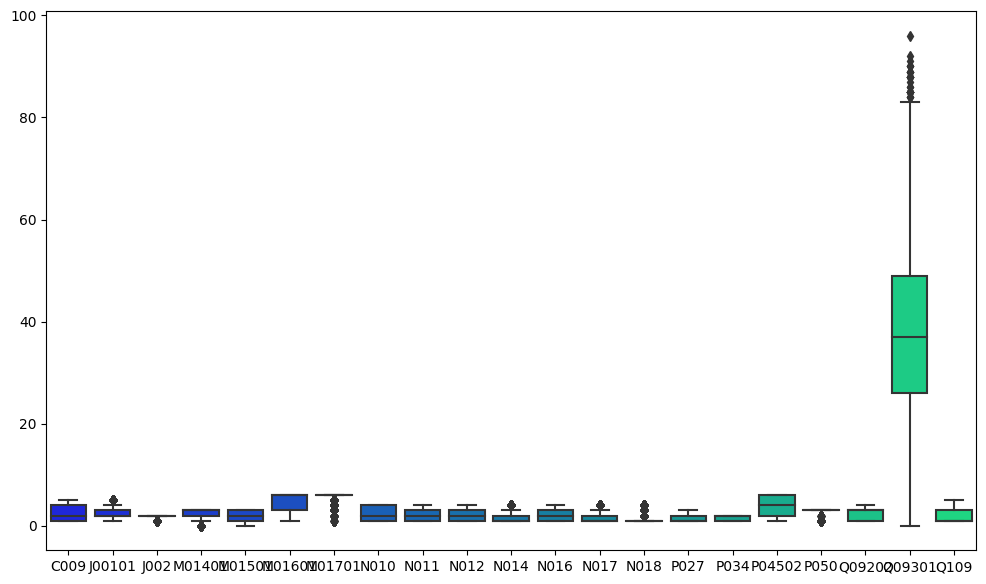

In [42]:
plt.figure(figsize=(12, 7)) #define o tamanho da figura
sns.boxplot(data=base_final_depressao_sim.drop(['V0026','C006','J007','Q092','Q11006'], axis =1),palette='winter') # pega
# os pontos acimas são outline, os seja dados com pouca frequência que não impacta no resultado
# boxplot : grafico de caixa e calcula a média e que exibia pelo linha

<Axes: >

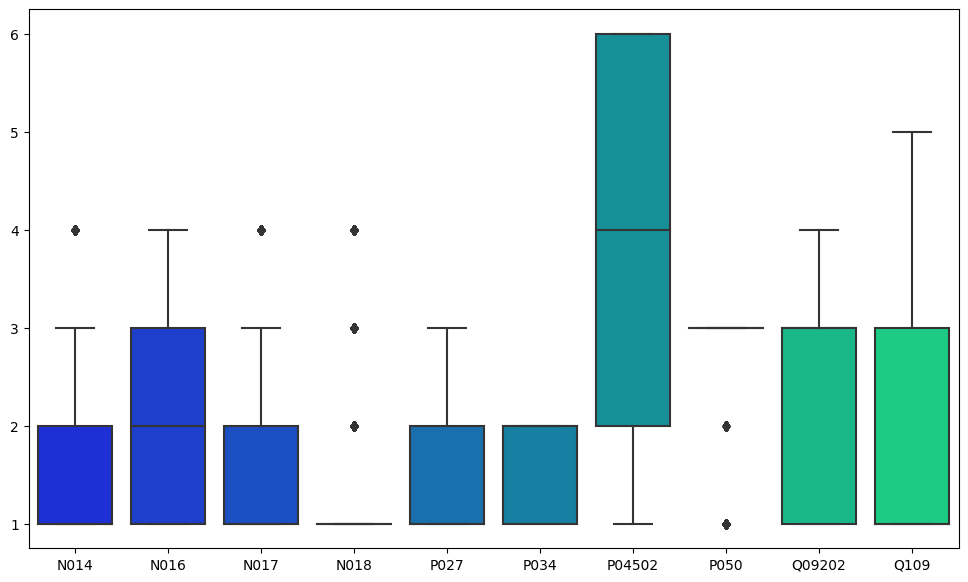

In [43]:
plt.figure(figsize=(12, 7)) #define o tamanho da figura
sns.boxplot(data=base_final_depressao_sim.drop(['V0026','C006','J007','Q092','Q11006','C009','J00101','J002','M01401','M01501','M01601', 'M01701','N010','N011','N012','Q09301'], axis =1),palette='winter') # pega
# os pontos acimas são outline, os seja dados com pouca frequência que não impacta no resultado
# boxplot : grafico de caixa e calcula a média e que exibia pelo linha

Iremos manter o atributo N018, visto que se trata da frequência em que a pessoa tentou se ferir ou achou que seria melhor estar morto, mesmo tendo os outliers, são dados relevantes, visto que são respostas positivas em relação à pergunta e significativas para predizer a depressão.

Assim como o atributo P050,  

<Axes: >

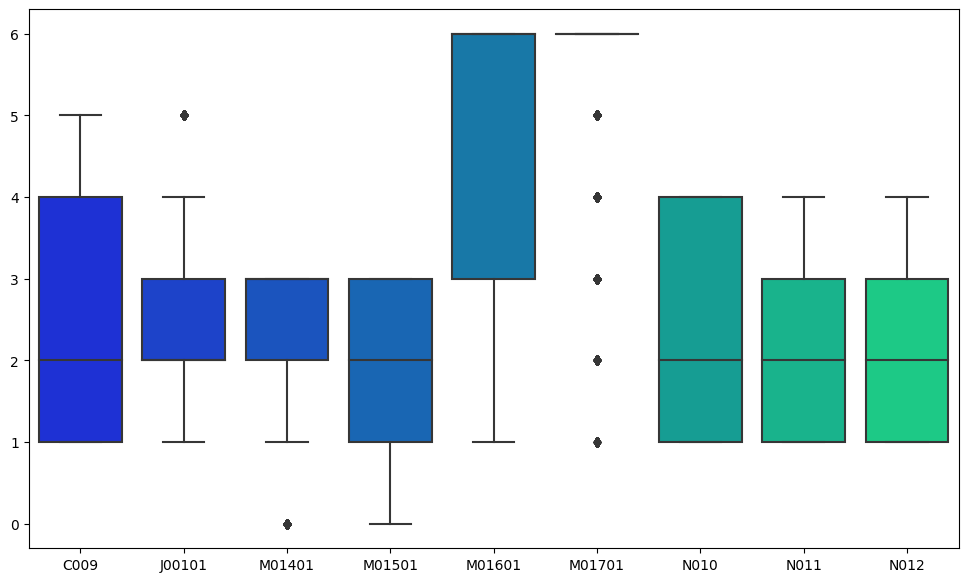

In [44]:
plt.figure(figsize=(12, 7)) #define o tamanho da figura
sns.boxplot(data=base_final_depressao_sim.drop(['V0026','C006','J007','J002','Q092','Q11006','N014','N016','N017','N018','P027','P034','P04502','P050','Q09202','Q09301','Q109'], axis =1),palette='winter') # pega
# os pontos acimas são outline, os seja dados com pouca frequência que não impacta no resultado
# boxplot : grafico de caixa e calcula a média e que exibia pelo linha

<Axes: >

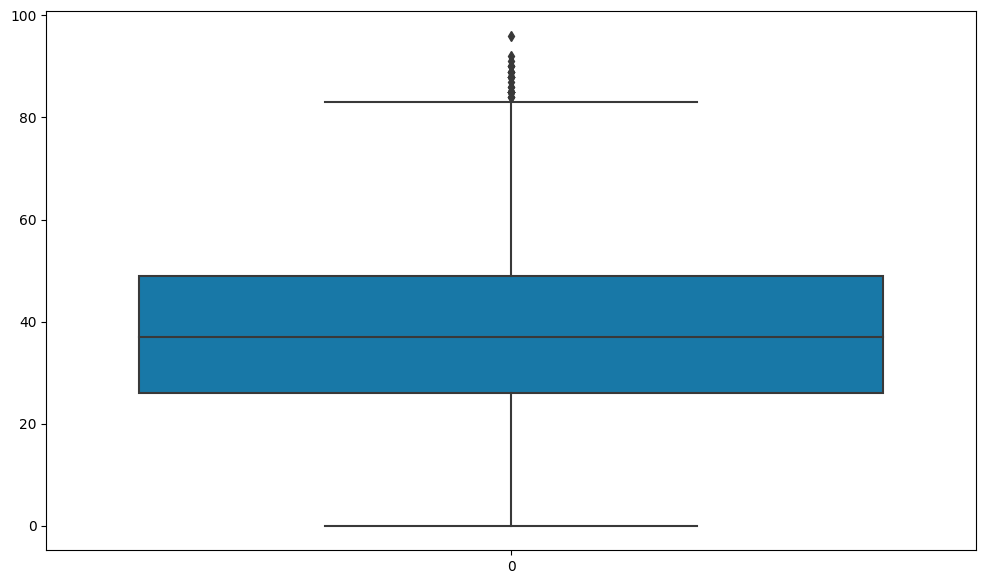

In [45]:
plt.figure(figsize=(12, 7)) #define o tamanho da figura
sns.boxplot(data=base_final_depressao_sim['Q09301'],palette='winter') # pega
# os pontos acimas são outline, os seja dados com pouca frequência que não impacta no resultado
# boxplot : grafico de caixa e calcula a média e que exibia pelo linha
# Idade no primeiro diagnóstico

# CRIAÇÃO DE GRÁFICO DE CORRELAÇÃO 


In [46]:
base_final_depressao_sim.corr()

,V0026,C006,C009,J00101,J002,J007,M01401,M01501,M01601,M01701,...,N018,P027,P034,P04502,P050,Q092,Q09202,Q09301,Q109,Q11006
V0026,1.000000,-0.050173,0.071627,0.050881,0.026563,-0.013564,0.065331,0.041367,0.108270,-0.002893,...,-0.010095,-0.090845,0.100682,0.168131,0.014466,NaN,0.014805,-0.001015,-0.018323,0.080329
C006,-0.050173,1.000000,0.044604,0.008932,-0.045924,-0.030271,-0.015781,-0.023510,-0.009984,0.051233,...,0.010543,-0.139748,0.039365,-0.072703,0.059096,NaN,-0.037163,-0.035443,-0.014490,0.003517
C009,0.071627,0.044604,1.000000,0.107178,-0.028232,0.035279,-0.049832,-0.103306,0.051944,0.032598,...,0.043865,-0.073374,0.039007,0.059509,-0.012161,NaN,0.069814,-0.059334,0.034480,0.010263
J00101,0.050881,0.008932,0.107178,1.000000,-0.319326,-0.061002,-0.115582,-0.154829,0.181869,0.097976,...,0.267092,-0.173362,0.182143,0.145894,-0.056073,NaN,-0.184918,0.083150,0.363668,-0.105055
J002,0.026563,-0.045924,-0.028232,-0.319326,1.000000,0.048790,0.072640,0.059873,-0.066194,0.000036,...,-0.164119,0.082489,-0.062207,-0.015403,0.027864,NaN,0.108719,-0.043480,-0.240648,0.093815
J007,-0.013564,-0.030271,0.035279,-0.061002,0.048790,1.000000,-0.008032,-0.007132,-0.032093,-0.000983,...,-0.024529,0.039346,-0.021519,0.011657,0.012809,NaN,0.147196,-0.111953,-0.046861,0.056045
M01401,0.065331,-0.015781,-0.049832,-0.115582,0.072640,-0.008032,1.000000,0.269762,-0.091367,-0.072841,...,-0.117001,0.010324,-0.094601,-0.012753,0.073846,NaN,-0.018764,0.042257,-0.099505,0.015425
M01501,0.041367,-0.023510,-0.103306,-0.154829,0.059873,-0.007132,0.269762,1.000000,-0.172255,-0.147483,...,-0.125092,0.095998,-0.133112,-0.077220,0.042825,NaN,-0.012065,0.039997,-0.110057,0.016204
M01601,0.108270,-0.009984,0.051944,0.181869,-0.066194,-0.032093,-0.091367,-0.172255,1.000000,0.205702,...,0.079376,-0.192259,0.550114,0.150234,-0.074620,NaN,-0.055323,0.120167,0.106551,0.050639
M01701,-0.002893,0.051233,0.032598,0.097976,0.000036,-0.000983,-0.072841,-0.147483,0.205702,1.000000,...,0.062002,-0.107683,0.166927,0.097006,-0.036985,NaN,-0.041663,0.052449,0.056552,0.037367


<Axes: >

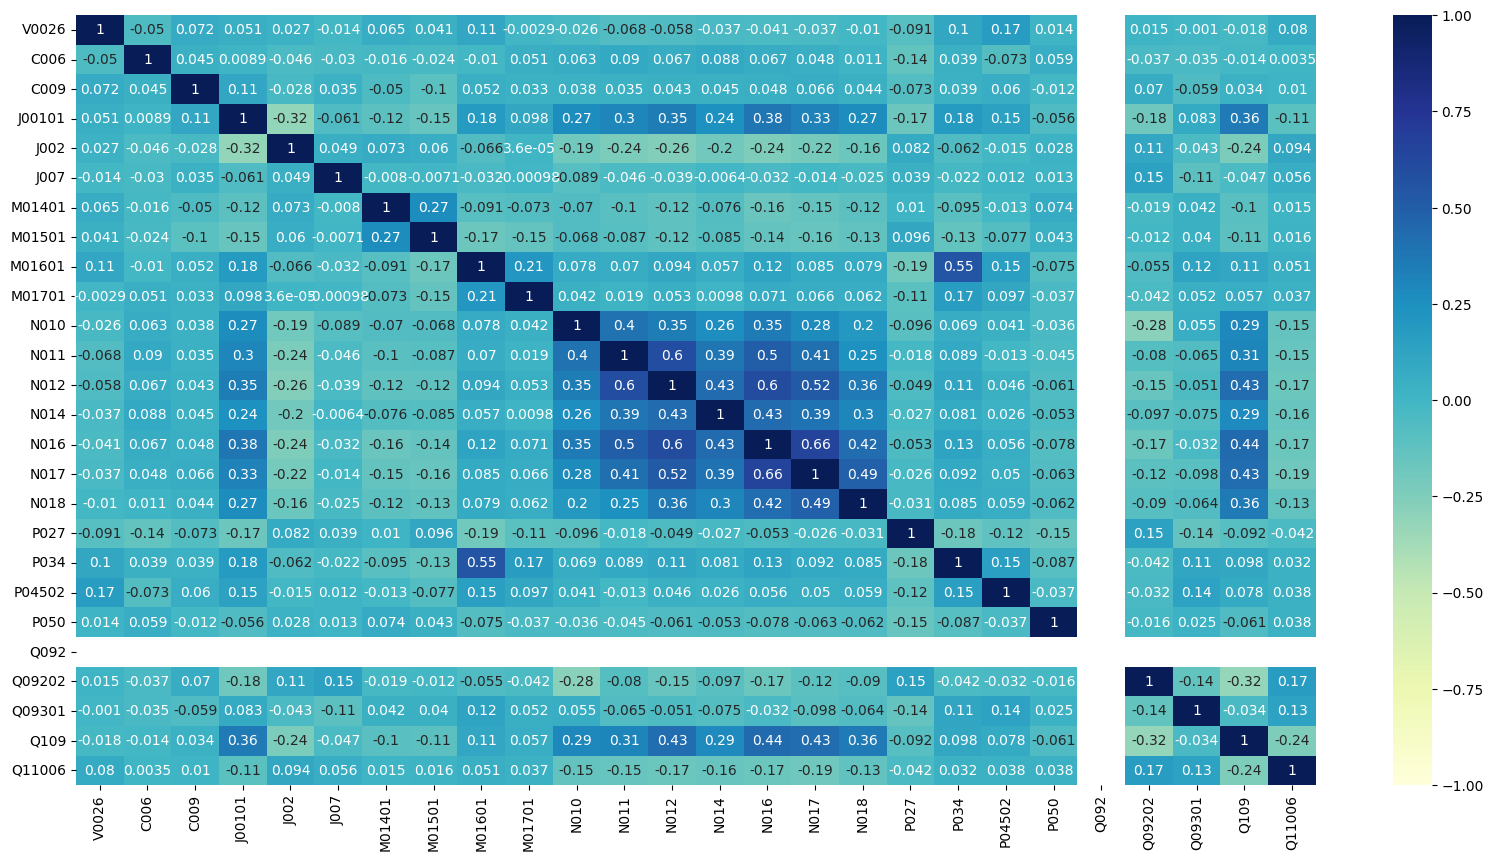

In [47]:
plt.figure(figsize=(20, 10)) #define o tamanho da figura
sns.heatmap(base_final_depressao_sim.corr(),annot=True, vmin=-1, vmax=+1, cmap='YlGnBu')
# a parte amarela no gráfico que dizer que tem dados nulos

<Axes: >

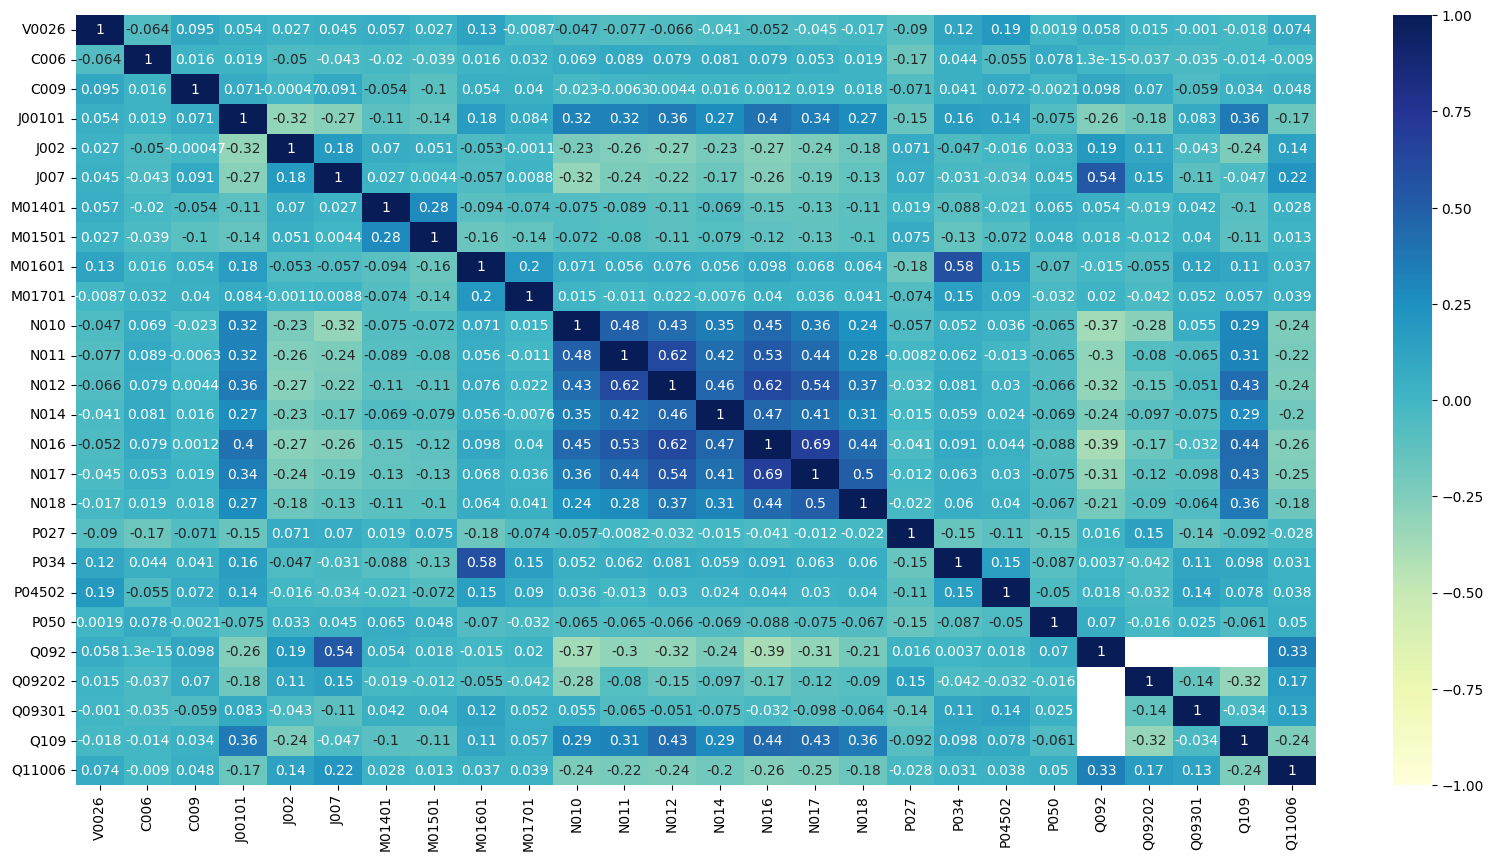

In [48]:
plt.figure(figsize=(20, 10)) #define o tamanho da figura
sns.heatmap(base_final.corr(),annot=True, vmin=-1, vmax=+1, cmap='YlGnBu')
# a parte amarela no gráfico que dizer que tem dados nulos

In [49]:
base_final_depressao_sim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8332 entries, 0 to 8331
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0026   8332 non-null   int64  
 1   C006    8332 non-null   float64
 2   C009    8332 non-null   float64
 3   J00101  8332 non-null   float64
 4   J002    8332 non-null   float64
 5   J007    8332 non-null   float64
 6   M01401  8332 non-null   float64
 7   M01501  8332 non-null   float64
 8   M01601  8332 non-null   float64
 9   M01701  8332 non-null   float64
 10  N010    8332 non-null   float64
 11  N011    8332 non-null   float64
 12  N012    8332 non-null   float64
 13  N014    8332 non-null   float64
 14  N016    8332 non-null   float64
 15  N017    8332 non-null   float64
 16  N018    8332 non-null   float64
 17  P027    8332 non-null   float64
 18  P034    8332 non-null   float64
 19  P04502  8332 non-null   float64
 20  P050    8332 non-null   float64
 21  Q092    8332 non-null   float64
 22  

In [50]:
base_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16664 entries, 0 to 16663
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0026   16664 non-null  int64  
 1   C006    16664 non-null  float64
 2   C009    16664 non-null  float64
 3   J00101  16664 non-null  float64
 4   J002    16664 non-null  float64
 5   J007    16664 non-null  float64
 6   M01401  16664 non-null  float64
 7   M01501  16664 non-null  float64
 8   M01601  16664 non-null  float64
 9   M01701  16664 non-null  float64
 10  N010    16664 non-null  float64
 11  N011    16664 non-null  float64
 12  N012    16664 non-null  float64
 13  N014    16664 non-null  float64
 14  N016    16664 non-null  float64
 15  N017    16664 non-null  float64
 16  N018    16664 non-null  float64
 17  P027    16664 non-null  float64
 18  P034    16664 non-null  float64
 19  P04502  16664 non-null  float64
 20  P050    16664 non-null  float64
 21  Q092    16664 non-null  float64
 22

Q09202: REMÉDIO será removida

Q09301: Idade do diagnostico - permanece

Q109: Em geral, em que grau a depressão limita as suas atividades habituais (tais como trabalhar, realizar afazeres domésticos, etc.)? : Será removida









In [51]:
base_final_depressao_sim=base_final_depressao_sim.drop(['Q09202'], axis=1)

In [52]:
base_final=base_final.drop(['Q09202'], axis=1)

In [53]:
base_final_depressao_sim=base_final_depressao_sim.drop(['Q09301'], axis=1)

In [54]:
base_final=base_final.drop(['Q09301'], axis=1)

In [55]:
base_final_depressao_sim=base_final_depressao_sim.drop(['Q109'], axis=1)

In [56]:
base_final=base_final.drop(['Q109'], axis=1)

In [57]:
base_final_depressao_sim.head()

,V0026,C006,C009,J00101,J002,J007,M01401,M01501,M01601,M01701,...,N014,N016,N017,N018,P027,P034,P04502,P050,Q092,Q11006
0,1,2.0,1.0,3.0,2.0,1.0,3.0,0.0,6.0,6.0,...,1.0,2.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,2.0
1,1,1.0,1.0,1.0,2.0,1.0,3.0,2.0,3.0,6.0,...,1.0,1.0,1.0,1.0,2.0,1.0,2.0,3.0,1.0,2.0
2,1,2.0,1.0,2.0,2.0,1.0,3.0,3.0,6.0,4.0,...,4.0,4.0,4.0,1.0,1.0,1.0,2.0,3.0,1.0,2.0
3,1,2.0,1.0,3.0,2.0,1.0,3.0,2.0,6.0,6.0,...,2.0,4.0,4.0,4.0,3.0,2.0,2.0,1.0,1.0,2.0
4,1,2.0,4.0,3.0,1.0,1.0,3.0,3.0,1.0,6.0,...,4.0,4.0,4.0,1.0,1.0,1.0,6.0,1.0,1.0,2.0


In [58]:
base_final_depressao_sim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8332 entries, 0 to 8331
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0026   8332 non-null   int64  
 1   C006    8332 non-null   float64
 2   C009    8332 non-null   float64
 3   J00101  8332 non-null   float64
 4   J002    8332 non-null   float64
 5   J007    8332 non-null   float64
 6   M01401  8332 non-null   float64
 7   M01501  8332 non-null   float64
 8   M01601  8332 non-null   float64
 9   M01701  8332 non-null   float64
 10  N010    8332 non-null   float64
 11  N011    8332 non-null   float64
 12  N012    8332 non-null   float64
 13  N014    8332 non-null   float64
 14  N016    8332 non-null   float64
 15  N017    8332 non-null   float64
 16  N018    8332 non-null   float64
 17  P027    8332 non-null   float64
 18  P034    8332 non-null   float64
 19  P04502  8332 non-null   float64
 20  P050    8332 non-null   float64
 21  Q092    8332 non-null   float64
 22  

<Axes: >

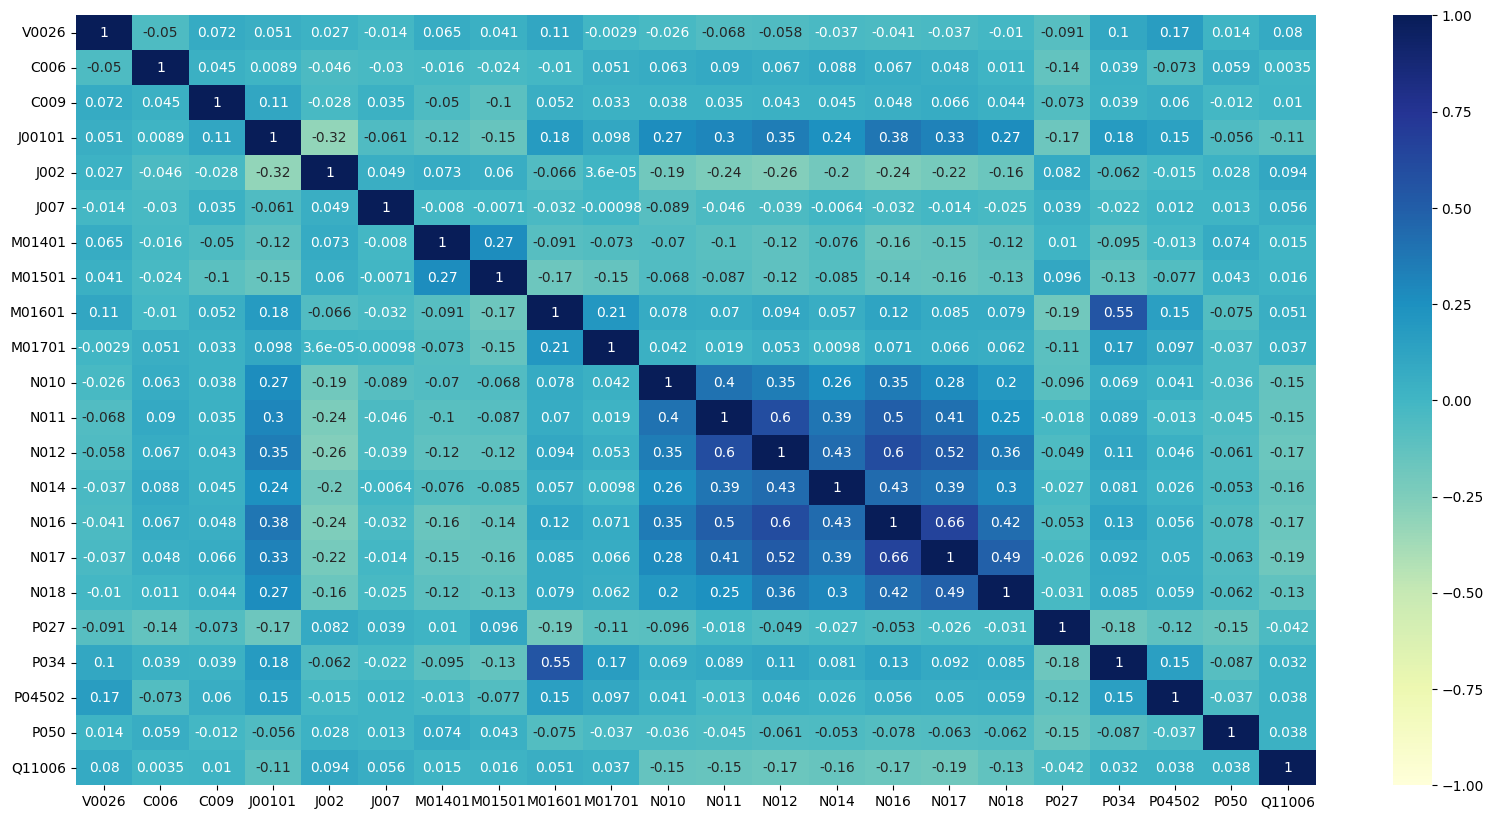

In [59]:
plt.figure(figsize=(20, 10)) #define o tamanho da figura
sns.heatmap(base_final_depressao_sim.drop(['Q092'], axis=1).corr(),annot=True, vmin=-1, vmax=+1, cmap='YlGnBu')

In [61]:
base_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16664 entries, 0 to 16663
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0026   16664 non-null  int64  
 1   C006    16664 non-null  float64
 2   C009    16664 non-null  float64
 3   J00101  16664 non-null  float64
 4   J002    16664 non-null  float64
 5   J007    16664 non-null  float64
 6   M01401  16664 non-null  float64
 7   M01501  16664 non-null  float64
 8   M01601  16664 non-null  float64
 9   M01701  16664 non-null  float64
 10  N010    16664 non-null  float64
 11  N011    16664 non-null  float64
 12  N012    16664 non-null  float64
 13  N014    16664 non-null  float64
 14  N016    16664 non-null  float64
 15  N017    16664 non-null  float64
 16  N018    16664 non-null  float64
 17  P027    16664 non-null  float64
 18  P034    16664 non-null  float64
 19  P04502  16664 non-null  float64
 20  P050    16664 non-null  float64
 21  Q092    16664 non-null  float64
 22

In [62]:
base_final.to_csv("Base_Final_Depressao.csv")

# TREINO E TESTE DO RANDOM FLOREST

In [60]:
coluna = []
for i in range(0,8332):
    coluna.append(1)
#print(coluna)

In [ ]:
df_teste = pd.DataFrame(base_final_depressao_sim).copy()
df_teste.insert(10, "Coluna", coluna, True)

In [ ]:
coluna2 = []
for i in range(0,8332):
    coluna2.append(2)
#print(coluna)

In [ ]:
df_teste.insert(11, "Coluna2", coluna2, True)

<Axes: >

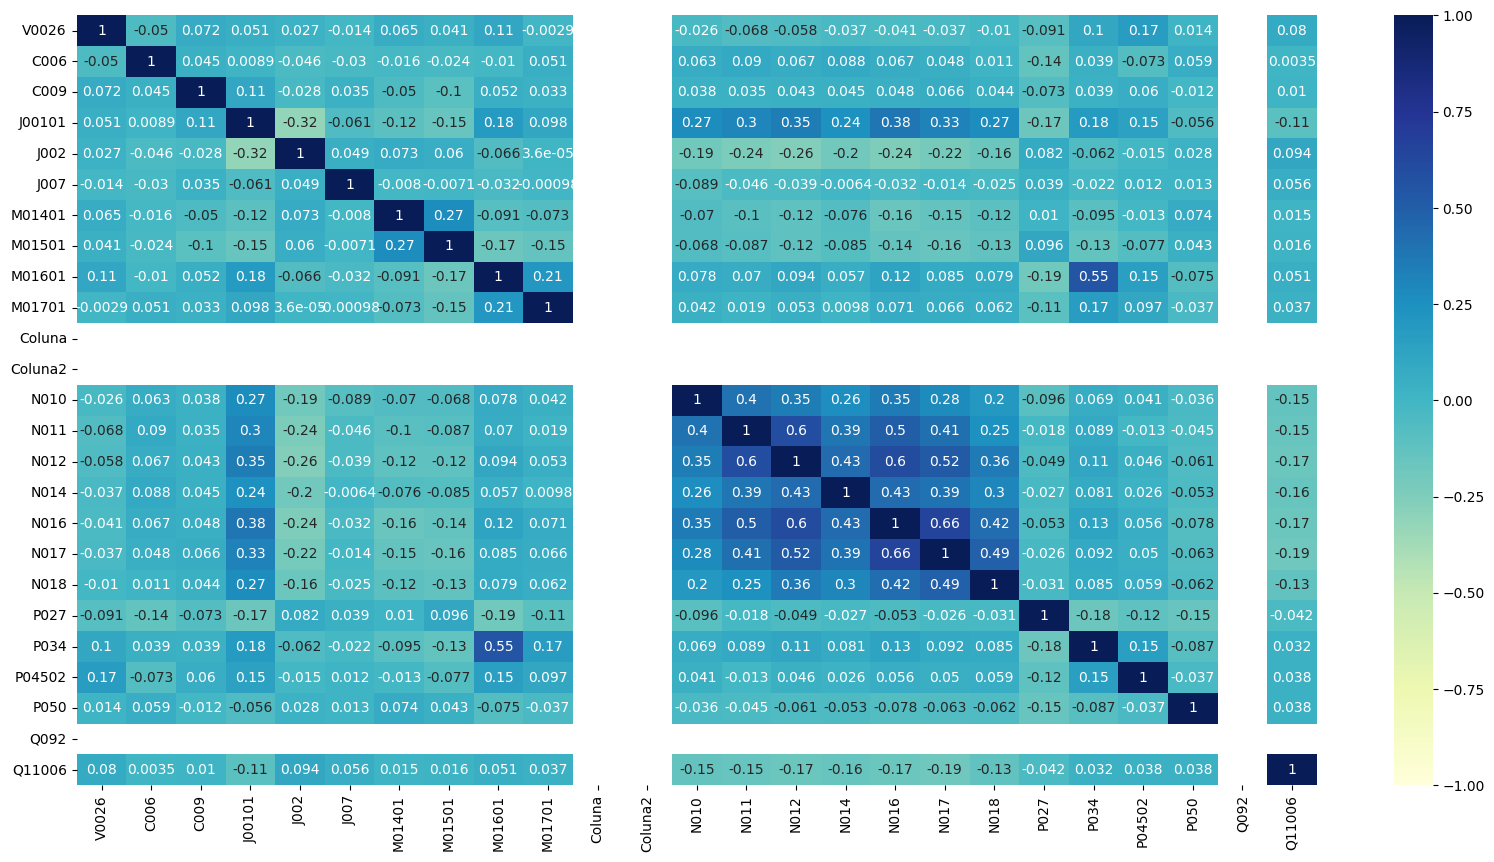

In [ ]:
plt.figure(figsize=(20, 10)) #define o tamanho da figura
sns.heatmap(df_teste.corr(),annot=True, vmin=-1, vmax=+1, cmap='YlGnBu')
# a parte amarela no gráfico que dizer que tem dados nulos

# TREINO E TESTE DO RANDOM FLOREST

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # floresta aleatoria
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
X = base_final.drop('Q092',axis=1) # coloca em uma variavel a base sem a Coluna mencionada
y = base_final['Q092'] # coloca em um variavel a coluba mencionada

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40,random_state=101)
# defini os nomes da variaveis de teste e treino, a quantidade de dados a ser usado e a semente para gerar

In [ ]:
rfc = RandomForestClassifier(n_estimators=100) # passa para um variavel menor, falando o tanto de arvores na floresta

In [ ]:
rfc.fit(X_train, y_train) # criar uma curva de ajuste com os dados de treino

RandomForestClassifier()

In [ ]:
rfc_pred = rfc.predict(X_test) # joga em uma variavel a predição do dados de teste da floresta aleatoria

In [ ]:
print(confusion_matrix(y_test,rfc_pred)) # exibe a matrix de confusão do dados de teste e dos dados preditos

[[2048  439]
 [ 697 1816]]


In [ ]:
print(classification_report(y_test,rfc_pred)) #exibe a matrix de confusão e suas classificações do dados de teste e dos dados preditos

              precision    recall  f1-score   support

         1.0       0.75      0.82      0.78      2487
         2.0       0.81      0.72      0.76      2513

    accuracy                           0.77      5000
   macro avg       0.78      0.77      0.77      5000
weighted avg       0.78      0.77      0.77      5000



In [ ]:
#sns.pairplot(base_final, hue='Q092')

In [ ]:
#error_rate = []

#for i in range(1,200):

#    rfc = RandomForestClassifier(n_estimators=i)
#    rfc.fit(X_train, y_train)
#    pred_i = rfc_pred = rfc.predict(X_test)
#    error_rate.append(np.mean(pred_i != y_test))#calcula a taxa de erro entre os valores reais e os preditos e armazena no array

In [ ]:
#plt.figure(figsize=(10,6))#define a escala do gráfico
#plt.plot(range(1,200),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)#plota o eixo x com o range(seta o ínicio e fim do eixo x) de 1 a 40, passa o error_rate, maker_>> marca os pontos de controle
#plt.title('Error Rate vs. Número de árvores')
#plt.xlabel('N árvores')
#plt.ylabel('Error Rate')

In [ ]:
#A menor taxa de erro
rfc = RandomForestClassifier(n_estimators=79)
#79
rfc.fit(X_train, y_train)#faz o ajuste
pred = rfc_pred = rfc.predict(X_test)#prediz os dados baseado na massa de dados X_test

print('Com n = 79')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

Com n = 79


[[2033  454]
 [ 698 1815]]


              precision    recall  f1-score   support

         1.0       0.74      0.82      0.78      2487
         2.0       0.80      0.72      0.76      2513

    accuracy                           0.77      5000
   macro avg       0.77      0.77      0.77      5000
weighted avg       0.77      0.77      0.77      5000



In [ ]:
# uma pessoa que possivelmente não tem depressão
pessoaR1 = np.array([1, 1, 1, 3, 1, 2, 1, 2, 6, 2, 1, 2, 1, 4, 4, 4, 1, 2, 2, 3, 2, 2])
predicaoR1 = rfc.predict(pessoaR1.reshape(1,-1)) # prediz o resultado
print("Diagnosticado com depressão" if predicaoR1 == 1 else "Não diagnosticado com depressão")  # imprime o resultado

Não diagnosticado com depressão


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# uma pessoa que possivelmente não tem depressão
pessoaR2 = np.array([2, 2, 5, 2, 2, 2, 3, 1, 4, 2, 1, 2, 4, 2, 3, 3, 2, 2, 5, 3, 2, 1])
predicaoR2 = rfc.predict(pessoaR2.reshape(1,-1)) # prediz o resultado
print("Diagnosticado com depressão" if predicaoR2 == 1 else "Não diagnosticado com depressão") 

Não diagnosticado com depressão


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#provavelmente possui depressão 
pessoa3 = np.array([1, 2, 2, 5, 1, 1, 0, 0, 6, 6, 4, 4, 4, 4, 4, 4, 3, 1, 2, 4, 2, 2])
predicao3 = rfc.predict(pessoa3.reshape(1,-1)) # prediz o resultado
print("Diagnosticado com depressão" if predicao3 == 1 else "Não diagnosticado com depressão")

Diagnosticado com depressão


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#provavelmente possui depressão
pessoaR4 = np.array([2, 1, 3, 5, 1, 1, 3, 2, 5, 6, 4, 4, 3, 4, 4, 3, 3, 1, 2, 4, 2, 1])
predicaoR4 = rfc.predict(pessoaR4.reshape(1,-1)) # prediz o resultado
print("Diagnosticado com depressão" if predicaoR4 == 1 else "Não diagnosticado com depressão") 

Diagnosticado com depressão


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# TREINO E PREDIÇÃO COM SVM

In [ ]:
df_rotulo = pd.DataFrame(base_final['Q092'],columns=['Depressão'])#Cria um novo dataframe com os dados da coluna Q092, com uma coluna nomeada 'depressão


In [ ]:
df_rotulo.head()

,Depressão


In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC()

In [ ]:
model.fit(X_train,y_train)

SVC()

In [ ]:
predictions = model.predict(X_test)#predizer a massa de dados do X_test

In [ ]:
print(confusion_matrix(y_test,predictions))

[[2103  384]
 [ 704 1809]]


In [ ]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[2103  384]
 [ 704 1809]]
              precision    recall  f1-score   support

         1.0       0.75      0.85      0.79      2487
         2.0       0.82      0.72      0.77      2513

    accuracy                           0.78      5000
   macro avg       0.79      0.78      0.78      5000
weighted avg       0.79      0.78      0.78      5000



 0   V0026   Tipo de situação censitária

 1   C006    Sexo

 2   C009    cor ou raça 
 3   J00101  Considerando saúde como um estado de bem-estar físico e mental, e não somente a ausência de doenças, como é o estado de saúde de

 4   J002    Nas duas últimas semanas, ___ deixou de realizar quaisquer de suas atividades habituais (trabalhar, ir à escola, brincar, afazeres domésticos etc.) por motivo da própria saúde

 5   J007    Algum médico já deu o diagnóstico de alguma doença crônica, física ou mental, ou doença de longa duração (de mais de 6 meses de duração) a ___

 6   M01401  Com quantos familiares ou parentes ___ pode contar em momentos bons ou ruins

 7   M01501  Com quantos amigos próximos ___ pode contar em momentos bons ou ruins (Sem considerar os familiares ou parentes

 8   M01601  Nos últimos doze meses, com que frequência o(a) Sr(a) se reuniu com outras pessoas para prática de atividades esportivas, exercícios físicos, recreativos ou artísticos

 9   M01701  Nos últimos doze meses, com que frequência o(a) Sr(a) participou de reuniões de grupos como associações de moradores ou funcionários, movimentos sociais/comunitários, centros acadêmicos ou similares

 10  N010    Nas duas últimas semanas, com que frequência o(a) Sr(a) teve problemas no sono, como dificuldade para adormecer, acordar frequentemente à noite ou dormir mais do que de costume? 

 11  N011    Nas duas últimas semanas, com que frequência o(a) Sr(a) teve problemas por não se sentir descansado(a) e disposto(a) durante o dia, sentindo-se cansado(a), sem ter energia?

 12  N012    Nas duas últimas semanas, com que frequência o(a) Sr(a) teve pouco interesse ou não sentiu prazer em fazer as coisas? 

 13  N014     Nas duas últimas semanas, com que frequência o(a) Sr(a) teve problemas na alimentação, como ter falta de apetite ou comer muito mais do que de costume?

 14  N016    Nas duas últimas semanas, com que frequência o(a) Sr(a) se sentiu deprimido(a), “pra baixo” ou sem perspectiva?

 15  N017    Nas duas últimas semanas, com que frequência o(a) Sr(a) se sentiu mal consigo mesmo, se achando um fracasso ou achando que decepcionou sua família?

 16  N018    Nas duas últimas semanas, com que frequência o(a) Sr(a) pensou em se ferir de alguma maneira ou achou que seria melhor estar morto?

 17  P027    Com que frequência o(a) Sr(a) costuma consumir alguma bebida alcoólica?

 18  P034    Nos últimos três meses, o(a) Sr(a) praticou algum tipo de exercício físico ou esporte? 

 19  P04502  Em um dia, quantas horas do seu tempo livre (excluindo o trabalho), o(a) Sr(a) costuma usar computador, tablet ou celular para lazer, tais como: utilizar redes sociais, para ver notícias, vídeos, jogar etc? 

 20  P050   Atualmente, o(a) Sr(a) fuma algum produto do tabaco?

 22  Q11006  Algum médico ou profissional de saúde (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de outra doença mental, como transtorno de ansiedade, síndrome do pânico, esquizofrenia, transtorno bipolar, psicose ou TOC (Transtorno Obsessivo Compulsivo) etc?

In [ ]:
# uma pessoa que possivelmente não tem depressão
pessoa1 = np.array([1, 1, 1, 3, 1, 2, 1, 2, 6, 2, 1, 2, 1, 4, 4, 4, 1, 2, 2, 3, 2, 2])
predicao1 = model.predict(pessoa1.reshape(1,-1)) # prediz o resultado
# imprime o resultado
print("Diagnosticado com depressão" if predicao1 == 1 else "Não diagnosticado com depressão")

Não diagnosticado com depressão


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
# uma pessoa que possivelmente não tem depressão
pessoa2 = np.array([2, 2, 5, 2, 2, 2, 3, 1, 4, 2, 1, 2, 4, 2, 3, 3, 2, 2, 5, 3, 2, 1])
predicao2 = model.predict(pessoa2.reshape(1,-1)) # prediz o resultado
print("Diagnosticado com depressão" if predicao2 == 1 else "Não diagnosticado com depressão")

Não diagnosticado com depressão


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
#provavelmente possui depressão 
pessoa3 = np.array([1, 2, 2, 5, 1, 1, 0, 0, 6, 6, 4, 4, 4, 4, 4, 4, 3, 1, 2, 4, 2, 2])
predicao3 = model.predict(pessoa3.reshape(1,-1)) # prediz o resultado
print("Diagnosticado com depressão" if predicao3 == 1 else "Não diagnosticado com depressão")

Diagnosticado com depressão


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
#provavelmente possui depressão
pessoa4 = np.array([2, 1, 3, 5, 1, 1, 3, 2, 5, 6, 4, 4, 3, 4, 4, 3, 3, 1, 2, 4, 2, 1])
predicao4 = model.predict(pessoa4.reshape(1,-1)) # prediz o resultado
print("Diagnosticado com depressão" if predicao4 == 1 else "Não diagnosticado com depressão")

Diagnosticado com depressão


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
